## **Cars Data Analysis Project**

by jeseenaparveenk@gmail.com

In [1]:
%pip install numpy pandas matplotlib seaborn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os

In [9]:
car_data = pd.read_csv(r"C:/Users/jesee/Downloads/Data Analysis Projects/2 Cars.csv", encoding_errors='ignore', engine='python') 

In [7]:
car_data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [10]:
car_data.shape

(432, 15)

In [11]:
#1. Find null values & fill with mean value if any
car_data.isnull()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
car_data.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [17]:
car_data['Cylinders'] = car_data['Cylinders'].fillna(car_data['Cylinders'].mean())

In [18]:
car_data.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      0
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [13]:
# Cleaning columns MSRP and Invoice: convert to string, remove $ and , then strip spaces
car_data['MSRP'] = pd.to_numeric(
    car_data['MSRP'].astype(str).replace(r'[\$,]', '', regex=True).str.strip(),
    errors='coerce')
car_data['Invoice'] = pd.to_numeric(
    car_data['Invoice'].astype(str).replace(r'[\$,]', '', regex=True).str.strip(),
    errors='coerce')

In [14]:
# Identify=ing numeric and categorical columns
numeric_cols = car_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = car_data.select_dtypes(include=['object']).columns

In [15]:
# Filling numeric columns with mean
car_data[numeric_cols] = car_data[numeric_cols].fillna(car_data[numeric_cols].mean())

# Fill categorical columns with mode
for col in categorical_cols:car_data[col] = car_data[col].fillna(car_data[col].mode()[0])

# Verify no missing values remain
print(car_data.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [28]:
#2. Check different types of 'Make' of cars and the number of occurences
car_data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [29]:
car_data['Make'].value_counts()

Make
Toyota           32
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Jaguar           12
Hyundai          12
Volvo            12
Mazda            11
Subaru           11
Pontiac          11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Cadillac          8
GMC               8
Saturn            8
Suzuki            8
Infiniti          8
Acura             7
Porsche           7
Saab              7
Oldsmobile        3
Jeep              3
Land Rover        3
MINI              2
Isuzu             2
Scion             2
Hummer            1
Name: count, dtype: int64

In [30]:
car_data['Model'].value_counts()

Model
C240 4dr                            6
G35 4dr                             2
C320 4dr                            2
MDX                                 1
RSX Type S 2dr                      1
                                   ..
RS 6 4dr                            1
TT 1.8 convertible 2dr (coupe)      1
TT 1.8 Quattro 2dr (convertible)    1
TT 3.2 coupe 2dr (convertible)      1
A4 3.0 4dr                          1
Name: count, Length: 425, dtype: int64

In [31]:
car_data['Type'].value_counts()

Type
Sedan     266
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: count, dtype: int64

In [32]:
car_data['Origin'].value_counts()

Origin
Asia      162
USA       147
Europe    123
Name: count, dtype: int64

In [33]:
#3. all records where origin is Asia or Europe
car_data[car_data['Origin'].isin(['Asia', 'Europe'])]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [36]:
#car_data[(car_data['Origin'] =='Asia') | (car_data['Origin'] =='Europe')]

In [37]:
#4. Remove all records for weight > 4000
car_data[car_data['Weight'] > 4000]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
15,Audi,A4 3.0 Quattro convertible 2dr,Sedan,Europe,All,44240.0,40075.0,3.0,6.0,220.0,18.0,25.0,4013.0,105.0,180.0
17,Audi,A6 4.2 Quattro 4dr,Sedan,Europe,All,49690.0,44936.0,4.2,8.0,300.0,17.0,24.0,4024.0,109.0,193.0
18,Audi,A8 L Quattro 4dr,Sedan,Europe,All,69190.0,64740.0,4.2,8.0,330.0,17.0,24.0,4399.0,121.0,204.0
20,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417.0,4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Volkswagen,Touareg V6,SUV,Europe,All,35515.0,32243.0,3.2,6.0,220.0,15.0,20.0,5086.0,112.0,187.0
415,Volkswagen,Phaeton 4dr,Sedan,Europe,Front,65000.0,59912.0,4.2,8.0,335.0,16.0,22.0,5194.0,118.0,204.0
416,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,75000.0,69130.0,6.0,12.0,420.0,12.0,19.0,5399.0,118.0,204.0
419,Volkswagen,Passat W8,Wagon,Europe,Front,40235.0,36956.0,4.0,8.0,270.0,18.0,25.0,4067.0,106.0,184.0


In [42]:
# ~ (bitwise NOT) operator inverts the boolean condition, effectively keeping rows where Weight is NOT greater than 4000.
# car_data = car_data[car_data['Weight'] <= 4000]
car_data[~(car_data['Weight'] > 4000)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100.0,41100.0,3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [17]:
heavy_cars = car_data[car_data['Weight'] > 4000]
light_cars = car_data[car_data['Weight'] <= 4000]

print("Heavy cars average horsepower:", heavy_cars['Horsepower'].mean())
print("Light cars average horsepower:", light_cars['Horsepower'].mean())

print("Heavy cars average MSRP:", heavy_cars['MSRP'].mean())
print("Light cars average MSRP:", light_cars['MSRP'].mean())

Heavy cars average horsepower: 270.9126213592233
Light cars average horsepower: 198.6581825412607
Heavy cars average MSRP: 44026.3786407767
Light cars average MSRP: 29252.34170383206


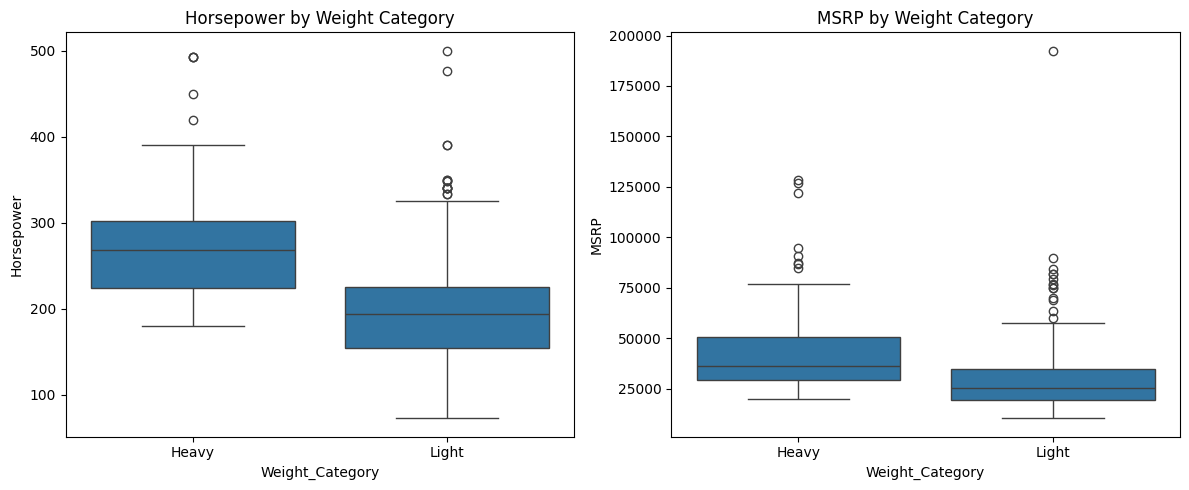

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

car_data['Weight_Category'] = car_data['Weight'].apply(lambda w: 'Heavy' if w > 4000 else 'Light')

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Weight_Category', y='Horsepower', data=car_data)
plt.title('Horsepower by Weight Category')

plt.subplot(1,2,2)
sns.boxplot(x='Weight_Category', y='MSRP', data=car_data)
plt.title('MSRP by Weight Category')
plt.tight_layout()
plt.savefig('horsemsrp.png', dpi=300)
plt.show()

In [43]:
car_data.shape

(432, 15)

In [44]:
#5. Increase all values MPG_City of by 3
car_data['MPG_City'] = car_data['MPG_City'].apply(lambda x:x+3)

In [45]:
car_data

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,20.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,27.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,25.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,23.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,21.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,24.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,23.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,22.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,25.0,29.0,2822.0,101.0,180.0


In [46]:
car_data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [50]:
#5. summary statistics (average MSRP, Horsepower, MPG_City) broken down by Make, Type, and Origin categories
car_data.groupby('Make')['MSRP'].mean().round(2)

Make
Acura            42938.57
Audi             43307.89
BMW              43285.25
Buick            30537.78
Cadillac         50474.38
Chevrolet        26587.04
Chrysler         27252.00
Dodge            26253.85
Ford             24015.87
GMC              29560.50
Honda            21434.71
Hummer           49995.00
Hyundai          17476.50
Infiniti         36070.00
Isuzu            26149.00
Jaguar           61580.42
Jeep             24518.33
Kia              15875.91
Land Rover       45831.67
Lexus            44215.45
Lincoln          42875.56
MINI             18499.00
Mazda            21770.73
Mercedes-Benz    60656.81
Mercury          27972.78
Mitsubishi       23423.62
Nissan           24730.94
Oldsmobile       23763.33
Pontiac          24156.36
Porsche          83565.00
Saab             37640.00
Saturn           17234.38
Scion            13565.00
Subaru           25501.82
Suzuki           16230.25
Toyota           23805.76
Volkswagen       32248.67
Volvo            36314.17
Name: M

In [49]:
car_data.groupby('Type')['Horsepower'].median()

Type
Hybrid     93.0
SUV       231.0
Sedan     200.0
Sports    287.0
Truck     208.5
Wagon     170.0
Name: Horsepower, dtype: float64

In [51]:
#6. Top performers
car_data.nlargest(5, 'Horsepower')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
116,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,81795.0,74451.0,8.3,10.0,500.0,15.0,20.0,3410.0,99.0,176.0
266,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493.0,16.0,19.0,4473.0,114.0,196.0
274,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493.0,17.0,21.0,4235.0,101.0,179.0
275,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493.0,16.0,19.0,4429.0,101.0,179.0
338,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477.0,20.0,24.0,3131.0,93.0,175.0


In [53]:
car_data.nlargest(5, 'MPG_Highway')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
152,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110.0,17911.0,2.0,3.0,73.0,63.0,66.0,1850.0,95.0,155.0
151,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,20140.0,18451.0,1.4,4.0,93.0,49.0,51.0,2732.0,103.0,175.0
377,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110.0,62.0,51.0,2890.0,106.0,175.0
408,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,21055.0,19638.0,1.9,4.0,100.0,41.0,46.0,3003.0,99.0,172.0
157,Honda,Civic HX 2dr,Sedan,Asia,Front,14170.0,12996.0,1.7,4.0,117.0,39.0,44.0,2500.0,103.0,175.0


In [54]:
# Bottom 5 cars with lowest Horsepower
car_data.nsmallest(5, 'Horsepower')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
152,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110.0,17911.0,2.0,3.0,73.0,63.0,66.0,1850.0,95.0,155.0
151,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,20140.0,18451.0,1.4,4.0,93.0,49.0,51.0,2732.0,103.0,175.0
408,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,21055.0,19638.0,1.9,4.0,100.0,41.0,46.0,3003.0,99.0,172.0
69,Chevrolet,Aveo 4dr,Sedan,USA,Front,11690.0,10965.0,1.6,4.0,103.0,31.0,34.0,2370.0,98.0,167.0
70,Chevrolet,Aveo LS 4dr hatch,Sedan,USA,Front,12585.0,11802.0,1.6,4.0,103.0,31.0,34.0,2348.0,98.0,153.0


In [55]:
# Bottom 5 cars with lowest MPG_Highway
car_data.nsmallest(5, 'MPG_Highway')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
169,Hummer,H2,SUV,USA,All,49995.0,45815.0,6.0,8.0,316.0,13.0,12.0,6400.0,123.0,190.0
120,Ford,Excursion 6.8 XLT,SUV,USA,All,41475.0,36494.0,6.8,10.0,310.0,13.0,13.0,7190.0,137.0,227.0
255,Mercedes-Benz,G500,SUV,Europe,All,76870.0,71540.0,5.0,8.0,292.0,16.0,14.0,5423.0,112.0,186.0
219,Land Rover,Range Rover HSE,SUV,Europe,All,72250.0,65807.0,4.4,8.0,282.0,15.0,16.0,5379.0,113.0,195.0
220,Land Rover,Discovery SE,SUV,Europe,All,39250.0,35777.0,4.6,8.0,217.0,15.0,16.0,4576.0,100.0,185.0


In [57]:
# 7. correlation between Weight and MPG_City to see if heavier cars have lower mileage.
car_data[['Weight', 'MPG_City']].corr()

,Weight,MPG_City
Weight,1.000000,-0.737966
MPG_City,-0.737966,1.000000


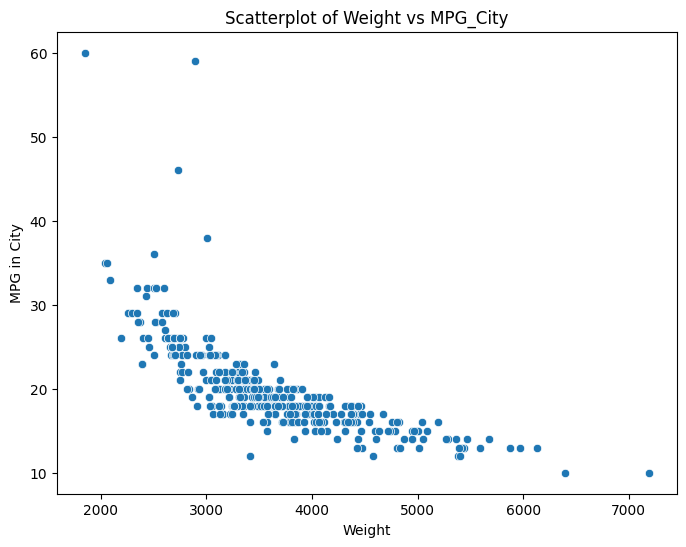

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Weight', y='MPG_City', data=car_data)
plt.title('Scatterplot of Weight vs MPG_City')
plt.xlabel('Weight')
plt.ylabel('MPG in City')
plt.show()

In [60]:
#8. Categorizing cars as “Heavy” or “Light” based on weight threshold (e.g., 3500).
car_data['Weight_Category'] = car_data['Weight'].apply(lambda x: 'Heavy' if x > 3500 else 'Light')
car_data

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Weight_Category
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,20.0,23.0,4451.0,106.0,189.0,Heavy
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,27.0,31.0,2778.0,101.0,172.0,Light
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,25.0,29.0,3230.0,105.0,183.0,Light
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,23.0,28.0,3575.0,108.0,186.0,Heavy
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,21.0,24.0,3880.0,115.0,197.0,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,24.0,28.0,3450.0,105.0,186.0,Light
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,23.0,26.0,3450.0,105.0,186.0,Light
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,22.0,26.0,3653.0,110.0,190.0,Heavy
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,25.0,29.0,2822.0,101.0,180.0,Light


In [61]:
#9.Number of unique car models per Make
car_data.groupby('Make')['Model'].nunique()

Make
Acura             7
Audi             19
BMW              20
Buick             9
Cadillac          8
Chevrolet        27
Chrysler         15
Dodge            13
Ford             23
GMC               8
Honda            17
Hummer            1
Hyundai          12
Infiniti          7
Isuzu             2
Jaguar           12
Jeep              3
Kia              11
Land Rover        3
Lexus            11
Lincoln           9
MINI              2
Mazda            11
Mercedes-Benz    24
Mercury           9
Mitsubishi       13
Nissan           17
Oldsmobile        3
Pontiac          11
Porsche           7
Saab              7
Saturn            8
Scion             2
Subaru           11
Suzuki            8
Toyota           29
Volkswagen       15
Volvo            12
Name: Model, dtype: int64

In [63]:
# 10. is MSRP is consistently higher than Invoice price
(car_data['MSRP'] >= car_data['Invoice']).all()

np.True_

In [64]:
#11. Cars with minimum or maximum Wheelbase or Length
car_data.loc[car_data['Wheelbase'].idxmax()]

Make                  Chevrolet
Model              Silverado SS
Type                      Truck
Origin                      USA
DriveTrain                  All
MSRP                    40340.0
Invoice                 35399.0
EngineSize                  6.0
Cylinders                   8.0
Horsepower                300.0
MPG_City                   16.0
MPG_Highway                17.0
Weight                   4804.0
Wheelbase                 144.0
Length                    238.0
Weight_Category           Heavy
Name: 89, dtype: object

In [65]:
car_data.loc[car_data['Length'].idxmin()]

Make                  MINI
Model               Cooper
Type                 Sedan
Origin              Europe
DriveTrain           Front
MSRP               16999.0
Invoice            15437.0
EngineSize             1.6
Cylinders              4.0
Horsepower           115.0
MPG_City              31.0
MPG_Highway           37.0
Weight              2524.0
Wheelbase             97.0
Length               143.0
Weight_Category      Light
Name: 242, dtype: object

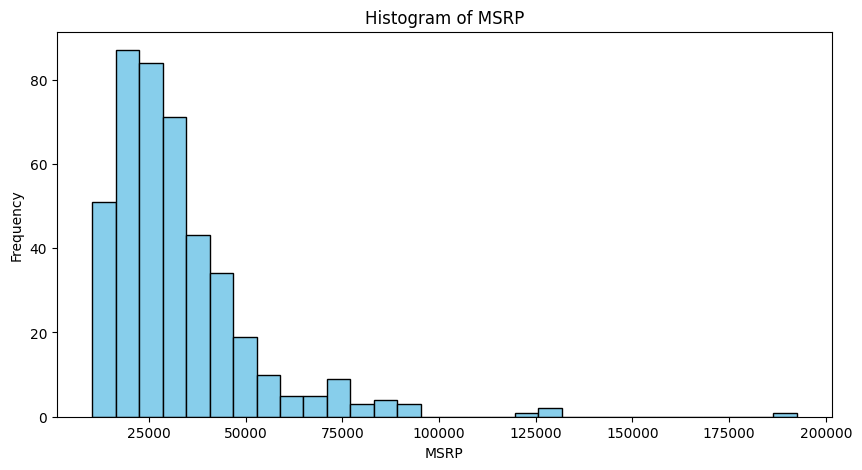

In [67]:
# histograms of MSRP and Horsepower
import matplotlib.pyplot as plt

# Histogram of MSRP
plt.figure(figsize=(10, 5))
plt.hist(car_data['MSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

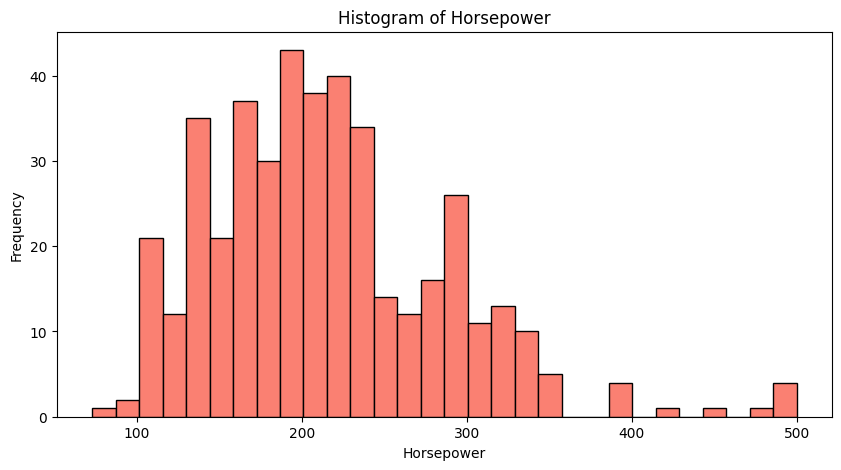

In [68]:
# Histogram of Horsepower
plt.figure(figsize=(10, 5))
plt.hist(car_data['Horsepower'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

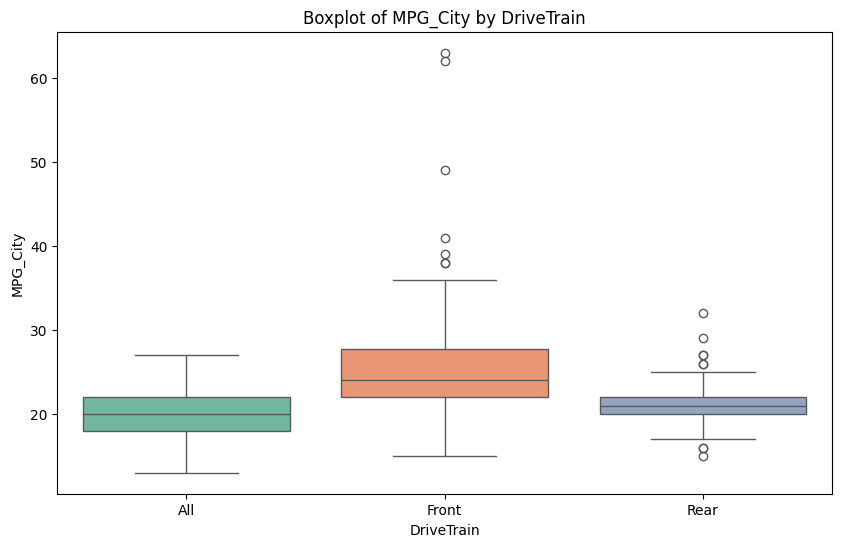

In [70]:
# Boxplot of MPG_City grouped by DriveTrain
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='DriveTrain', y='MPG_City', data=car_data, hue='DriveTrain', palette='Set2', legend=False)
plt.title('Boxplot of MPG_City by DriveTrain')
plt.xlabel('DriveTrain')
plt.ylabel('MPG_City')
plt.show()